# Linear Regression

Mean Square Error (MSE) for a Linear Regression Model is $$MSE(X, h_\theta) = \frac{1}{m} \sum_{i = 1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)})}$$

The normal equation to find $\hat{\theta}$ by which the cost function is minimized is as follows: $$\hat{\theta} = (X^T\cdot{}X)^{-1} \cdot X^T \cdot y$$
Lets generate some linear-looking data to test this equation on.

Text(0,0.5,'$y$')

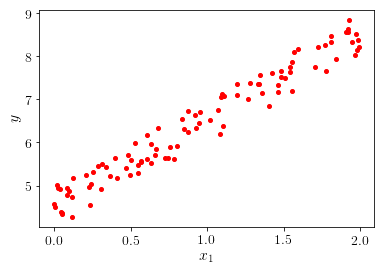

In [32]:
from __future__ import division, print_function, unicode_literals


import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
rc('text', usetex = True)
rc('font', family='serif')

X = 2 * np.random.rand (100, 1)
y = 4 + 2 * X + np.random.rand (100, 1) #np.random.rand (100, 1) is Guassian noise

plt.plot(X, y, 'r.', markersize=8)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

In [33]:
X_b = np.c_[np.ones((100,1)), X] # add x_0 for each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.57499626],
       [1.98755598]])

In this way, we trained our model. Now, we can make prediction using $\hat\theta$.

In [34]:
X_new_b = np.c_[[[1], [1]], [[0], [2]]]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.57499626],
       [8.55010821]])

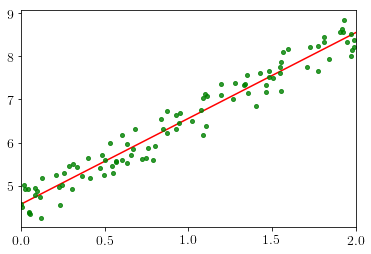

In [35]:
plt.plot([[0], [2]], y_predict, 'r-')
plt.plot(X, y, 'g.', markersize=8, alpha=0.8)
plt.margins(x = 0)
plt.show()

This is the equivalent code using __Scikit-Learn__.

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.57499626]), array([[1.98755598]]))

In [38]:
lin_reg.predict([[0], [2]])

array([[4.57499626],
       [8.55010821]])

# Computational Time for Linear Regression

The inverse matrix computation is costly and is $O(n^{2.4})$ to $O(n^3)$ depending on the implementation. Here, $n$ is the number of features. However, it is linear with regard to the number of instances. 

![Gradient Descent](images/GD.png)

Fortunately, the MSE cost function for a Linear Regression model happens to be a _convex function_, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, but just one global minimum.

Since we are considering different features in __GD__, we need to make sure that all features are in the same scale. We could use __StandardScaler__ class of Scikit-Learn.

# Batch Gradient Descent

For gradient descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. To compute this gradient, you can take a _partial derivative_ with regards to each feature weight $\theta_j$. Partial derivatives of the cost function is as follows:
$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)}}$$
Instead of computing this individually, you can compute all in one go.  The gradient vector, noted $\triangledown_\theta MSE(\theta)$ 
$$
\triangledown_\theta MSE(\theta) =  
\left(
    \begin{array}{}
      \frac{\partial}{\partial\theta_0}MSE(\theta) \\
      \frac{\partial}{\partial\theta_1}MSE(\theta) \\
      \vdots\vdots\vdots\vdots\vdots\vdots\vdots\vdots\vdots \\
      \frac{\partial}{\partial\theta_n}MSE(\theta)\\
    \end{array}
\right) = \frac{2}{m}X^T\cdot(X\cdot{}\theta-y)
$$

Noe that this formula involves calculation over full training set $X$, at each Gradient Descent Step! This is why the algorithm is called _Batch Gradient Descent_. Once you have gradient vector, which points uphill, you need to go in the opposite direction to go downhill. This means subtracting $\triangledown_\theta MSE(\theta)$ from $\theta$ with the size of downhill step $\eta$:
$$\theta^{(next~step)} = \theta - \eta \triangledown_\theta MSE(\theta)$$

In [40]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.57499626],
       [1.98755598]])

# Stochastic Gradient Descent

In this way, you can sample an instance of training set at each step, and take the partial derivative with regards to the sampled instance. It is much faster and can help find the global minimum when the cost function is irregular (is not convex); however, it never settle at the optimal answer but gets close to it. We can use __simulated annealing__ strategy, where steps start out large, then get smaller and smaller. It is good becasue at the beginiing with large steps, the algorithm can escape local minima. The function that determines the learning rate is called __learning schedule__. This code implements Stochastic Gradient Descent using a __simple learning schedule__:

In [52]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.57942564],
       [1.99521299]])

Here is Linear Regression using __SGD__ with Scikit-Learn, which defaults to optimizing the squared error cost function __(eta0 = 0.1)__. 

In [62]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) # starting learnirng rate is 0.1
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.57046642]), array([1.98146278]))

# Mini-batch Gradient Descent

In this way, instead of only one instance, you can sample small randome sets of instances called __mini_batches__. The main advantage is to get a performance boost from hardware optimization of matrix operations, especially when using GPUs. However, it may be harder for __mini_batch Gradient Descent__ to escape from local minima.

# Polynomial Regression

Text(0,0.5,'$y$')

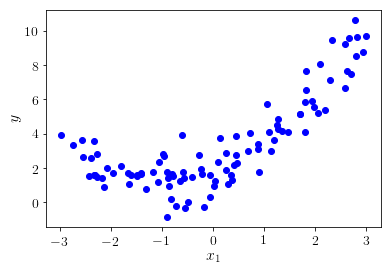

In [71]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called _polynomial Regression_. Lets use Scikit-Learn's __PolynomialFeatures__ class to transform our training data, adding the square of each feature in the training set as new features.

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly [0], X[0]

(array([0.13429983, 0.01803645]), array([0.13429983]))

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81146834]), array([[1.09132474, 0.55306342]]))

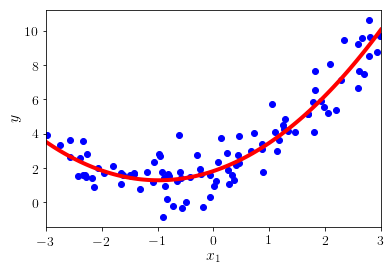

In [85]:
plt.plot(X, y, 'b.', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # generate random instances so that their ys can be predicted accordingly
X_new_poly = poly_features.fit_transform(X_new)
y_predict = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_predict, 'r-', linewidth=4)
plt.margins(x=0)

Note that when there are multiple features, __PolynomialFeatures__ adds all combinations of features up to the given degree. For exmaple, if we have two features $a$ and $b$, __PolynomialFeatures__ with __degree = 3__ would not only add $a^2$, $a^3$, $b^2$, $b^3$, but also $a^2b$, $ab^2$, and $ab$.Therefore, be careful when you are using __PolynomialFeatures__ becasue it can be in the order $O(n!)$.

# Learning Curves

A way of learning curves is to model's performance on the traning set and the validation set as a function of the training set size. The following code defines a function that plots the learning curves of a model given some traning data:

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_err, val_err = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_precit = model.predict(X_val)
        train_err.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_err.append(mean_squared_error(y_val_precit, y_val))
    plt.plot(np.sqrt(train_err), 'r:o', linewidth=2, label='Train Error')
    plt.plot(np.sqrt(val_err), 'b-.*', linewidth=2, label='Test Error')
    plt.ylim([0, 4])
    plt.legend(fontsize=20)
    plt.ylabel('RMSE')
    plt.xlabel('Training set size')

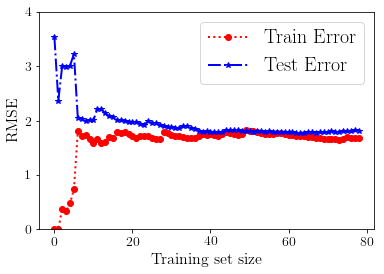

In [122]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Lets look at the a $10^{th}$-degree polynomial model on the same data. 

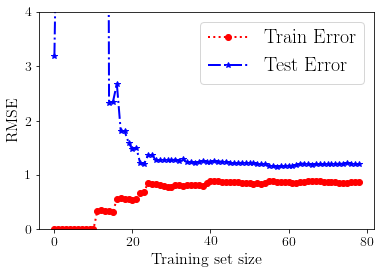

In [153]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

There are two points about the plot.
    1. Error on the training data is much lower than with linear regression model.
    2. The gap between the curves is the hallmark of an overfitting model.

### The BIASE/VARIANCE TRADEOFF

An important theoretical result of statistics and machine learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:

**Bias.** This part of gnenerlization error is due to wrong assumptions, such as assumping that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

**Variance.** This part is due to the model's excessive sensitivity to small variations in the training data.

**Irreducible error.** This part is due to the noisiness of the data itself. We can reduce this error by removing outliers or fixing the corrupts in data. 

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a tradeoff.


# Regularized Linear Models

A good way to reduce overfitting is regularize the model; the fewer degrees of freedom the model has, the harder it will be for it to overfit the data. For linear model, regularization is typically achieved by constraining the weights of the model. 
# Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression. $\alpha\sum_{i=1}^{n}{\theta_i^2}$ is added to 
the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Noe that the regularization term should only be added to the cost function during training. This is also common that the cost function used during training to be different from the performance measure used for testing. 

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$, then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}{\theta_i^2}$$

Here is the Ridge Regression closed-form solution: $$\hat\theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$$

Here is how Ridge Regression works with Scikit-Learn using a closed-form solution.

In [158]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.09909539]])

and using Stochastic Gradient Descent:

In [160]:
sgd_reg = SGDRegressor(penalty='l2') # use norm 2 of w (which is the vector of feature weights)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\vas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:131: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.33865867])